In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

LONDON_DATA_FILE = 'house_prices_london-P1.csv'



In [3]:
df = pd.read_csv('pp-complete.csv', header=None)

In [4]:
df.shape #22.8m rows

(22763598, 16)

In [5]:
#get an idea of the data
df.loc[0]

0     {F61BC602-B309-4373-B142-14C6F7CAD04C}
1                                      70000
2                           1995-06-09 00:00
3                                   EX39 1BE
4                                          D
5                                          N
6                                          F
7                                         14
8                                        NaN
9                                 LUNDY VIEW
10                                   NORTHAM
11                                  BIDEFORD
12                                  TORRIDGE
13                                     DEVON
14                                         A
15                                         A
Name: 0, dtype: object

In [6]:
df.tail(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
22763596,{582D0637-E099-8F22-E053-6C04A8C01BAC},40000,2017-04-06 00:00,SA33 4PQ,O,Y,F,DAWNS Y MOR,PLOT 2,NaN,PENDINE,CARMARTHEN,CARMARTHENSHIRE,CARMARTHENSHIRE,B,A
22763597,{582D0637-E09B-8F22-E053-6C04A8C01BAC},500000,2017-06-26 00:00,LD2 3NP,O,N,F,CAER BERIS MANOR HOTEL & RESTAURANT,NaN,NaN,NaN,BUILTH WELLS,POWYS,POWYS,B,A


In [7]:
df.columns=['ID','Sold Price','Sold Date','Postcode','Type','New Build','Freehold/Sharehold','House Number1','House Number2','Street Name1','City1','City2','Borough','Region','Unconfirmed1','Unconfirmed2']

In [8]:
#drop some of the columns such as ID, Unconfirmed1, Unconfirmed2
filtered_df=pd.DataFrame(df, columns=['Sold Price','Sold Date','Postcode','Type','New Build','Freehold/Sharehold','House Number1','House Number2','Street Name1','City1','City2','Borough','Region'])
filtered_df.tail(2) 

,Sold Price,Sold Date,Postcode,Type,New Build,Freehold/Sharehold,House Number1,House Number2,Street Name1,City1,City2,Borough,Region
22763596,40000,2017-04-06 00:00,SA33 4PQ,O,Y,F,DAWNS Y MOR,PLOT 2,NaN,PENDINE,CARMARTHEN,CARMARTHENSHIRE,CARMARTHENSHIRE
22763597,500000,2017-06-26 00:00,LD2 3NP,O,N,F,CAER BERIS MANOR HOTEL & RESTAURANT,NaN,NaN,NaN,BUILTH WELLS,POWYS,POWYS


In [9]:
#filter for specific region only
#final_df=filtered_df[filtered_df.Region=="GREATER LONDON"] 
final_df=filtered_df[(filtered_df.City1=='LONDON')|(filtered_df.City2=='LONDON')]
final_df.tail(2) 

,Sold Price,Sold Date,Postcode,Type,New Build,Freehold/Sharehold,House Number1,House Number2,Street Name1,City1,City2,Borough,Region
22763501,128379,2017-03-10 00:00,NaN,F,Y,L,ROYAL WHARF,FLAT 21C-06-02,NORTH WOOLWICH ROAD,NaN,LONDON,NEWHAM,GREATER LONDON
22763502,126912,2017-03-10 00:00,NaN,F,Y,L,ROYAL WHARF,FLAT 21C-06-03,NORTH WOOLWICH ROAD,NaN,LONDON,NEWHAM,GREATER LONDON


In [10]:
final_df.to_csv(LONDON_DATA_FILE, index=False)

In [11]:
#check data
final_df.iloc[0]
final_df.shape #0.9m records
final_df.tail(2) #does this contain 2017 data?

,Sold Price,Sold Date,Postcode,Type,New Build,Freehold/Sharehold,House Number1,House Number2,Street Name1,City1,City2,Borough,Region
22763501,128379,2017-03-10 00:00,NaN,F,Y,L,ROYAL WHARF,FLAT 21C-06-02,NORTH WOOLWICH ROAD,NaN,LONDON,NEWHAM,GREATER LONDON
22763502,126912,2017-03-10 00:00,NaN,F,Y,L,ROYAL WHARF,FLAT 21C-06-03,NORTH WOOLWICH ROAD,NaN,LONDON,NEWHAM,GREATER LONDON


In [12]:
lon_df = pd.read_csv(LONDON_DATA_FILE, header=0, encoding = "ISO-8859-1") #change encoding type
lon_df.iloc[0]
lon_df.tail(2)

,Sold Price,Sold Date,Postcode,Type,New Build,Freehold/Sharehold,House Number1,House Number2,Street Name1,City1,City2,Borough,Region
1801813,128379,2017-03-10 00:00,NaN,F,Y,L,ROYAL WHARF,FLAT 21C-06-02,NORTH WOOLWICH ROAD,NaN,LONDON,NEWHAM,GREATER LONDON
1801814,126912,2017-03-10 00:00,NaN,F,Y,L,ROYAL WHARF,FLAT 21C-06-03,NORTH WOOLWICH ROAD,NaN,LONDON,NEWHAM,GREATER LONDON


In [13]:
#fails with memory error
#gl_df['Postcode_short'] = df['Postcode'].str.split('::').str[0]

In [14]:
#check data types
#gl_df.dtypes

In [15]:
#fails with float errors
#gl_df['Postcode_short'] = [x.split()[0] for x in gl_df['Postcode']]

In [16]:
#fails
#gl_df['Postcode_short'] = gl_df['Postcode'].str.split()[0]

In [17]:
#convert to string
lon_df['Postcode'] = lon_df['Postcode'].astype('str') 

In [18]:
#extract first part of postcode
lon_df['Postcode_short'] = [x.split()[0] for x in lon_df['Postcode']]

In [19]:
#check
#gl_df.dtypes

In [20]:
lon_df.loc[900120]
lon_df.tail(2)

,Sold Price,Sold Date,Postcode,Type,New Build,Freehold/Sharehold,House Number1,House Number2,Street Name1,City1,City2,Borough,Region,Postcode_short
1801813,128379,2017-03-10 00:00,nan,F,Y,L,ROYAL WHARF,FLAT 21C-06-02,NORTH WOOLWICH ROAD,NaN,LONDON,NEWHAM,GREATER LONDON,nan
1801814,126912,2017-03-10 00:00,nan,F,Y,L,ROYAL WHARF,FLAT 21C-06-03,NORTH WOOLWICH ROAD,NaN,LONDON,NEWHAM,GREATER LONDON,nan


In [21]:
#choose E14 and flats only
E14_df=lon_df[(lon_df.Postcode_short=='E14') & (lon_df.Type=='F')] 
#need to sort by Sold Date
#E14_df.dtypes
#reorder by date
E14_df=E14_df.sort_values(by='Sold Date',ascending=True)


In [22]:
#E14_df.dtypes

In [23]:
E14_df.shape

(37941, 14)

In [24]:
#convert field to datetime
E14_df['Sold Date']=E14_df['Sold Date'].apply(pd.to_datetime)
E14_df.to_csv(LONDON_DATA_FILE, index=False)
E14_df.tail(2)

,Sold Price,Sold Date,Postcode,Type,New Build,Freehold/Sharehold,House Number1,House Number2,Street Name1,City1,City2,Borough,Region,Postcode_short
1778411,850000,2017-09-22,E14 5SH,F,N,L,331,NaN,BOARDWALK PLACE,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,E14
1778590,185000,2017-09-26,E14 7JZ,F,N,L,"BERGLEN COURT, 7",FLAT 199,BRANCH ROAD,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,E14


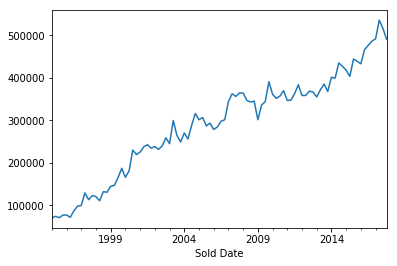

In [25]:
E14_df.index=E14_df['Sold Date']
E14_df.head(2)
resampled_df = E14_df['Sold Price'].resample('3M').mean()
resampled_df.plot()
plt.show()

In [26]:
#E14_df.head(10000).plot(x='Sold Date', y='Sold Price')
#E14_df.plot(x='Sold Date', y='Sold Price')
#plt.show() #graph per each individual sale - so very varied results

In [27]:
#E14_df['Sold Date'].head(20) #check dates

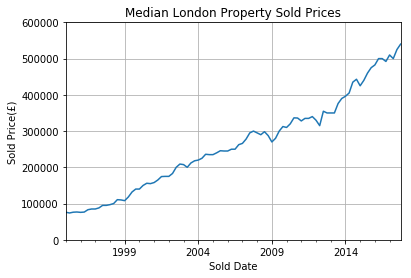

In [28]:
#Complete london prices sampled over 3 months - takes a long time to derive

lon_df['Sold Date']=lon_df['Sold Date'].apply(pd.to_datetime)
lon_df.index=lon_df['Sold Date']
resampled_df = lon_df['Sold Price'].resample('3M').median()
plt.ylabel('Sold Price(£)')
plt.title('Median London Property Sold Prices')
resampled_df.plot()
plt.ylim(0, 600000)
plt.grid()
plt.show()

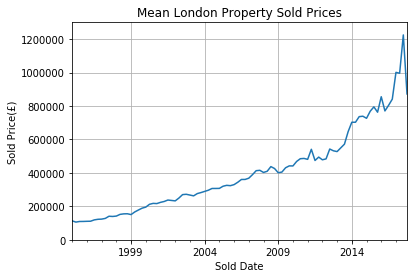

In [29]:
#Complete london prices sampled over 3 months - takes a long time to derive

lon_df['Sold Date']=lon_df['Sold Date'].apply(pd.to_datetime)
lon_df.index=lon_df['Sold Date']
resampled_df = lon_df['Sold Price'].resample('3M').mean()
plt.ylabel('Sold Price(£)')
plt.title('Mean London Property Sold Prices')
resampled_df.plot()
plt.ylim(0, 1300000)
plt.grid()
plt.show()

In [30]:
resampled_df

Sold Date
1995-01-31    1.132413e+05
1995-04-30    1.058450e+05
1995-07-31    1.094804e+05
1995-10-31    1.097656e+05
1996-01-31    1.105789e+05
1996-04-30    1.110961e+05
1996-07-31    1.190550e+05
1996-10-31    1.225622e+05
1997-01-31    1.236672e+05
1997-04-30    1.279356e+05
1997-07-31    1.408360e+05
1997-10-31    1.395589e+05
1998-01-31    1.418240e+05
1998-04-30    1.519739e+05
1998-07-31    1.550609e+05
1998-10-31    1.556257e+05
1999-01-31    1.507767e+05
1999-04-30    1.664872e+05
1999-07-31    1.781698e+05
1999-10-31    1.891183e+05
2000-01-31    1.954333e+05
2000-04-30    2.121637e+05
2000-07-31    2.177137e+05
2000-10-31    2.165343e+05
2001-01-31    2.238938e+05
2001-04-30    2.290600e+05
2001-07-31    2.376772e+05
2001-10-31    2.352459e+05
2002-01-31    2.326810e+05
2002-04-30    2.495408e+05
                  ...     
2010-07-31    4.847730e+05
2010-10-31    4.864789e+05
2011-01-31    4.810816e+05
2011-04-30    5.411017e+05
2011-07-31    4.741491e+05
2011-10-31    4.94